In [75]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [110]:
ipo = pd.read_excel("ipodata.xlsx")
ipo.head()

,Issuer Company,Listing Date,Issue Price,Issue Size\n(Rs Cr),QIB,NII,RII,EMP,Total,Open Price,Low Price,High Price,Close Price,* % Change
0,Gland Pharma Limited IPO,2020-11-20,1500,6479.55,6.40,0.51,0.24,NaN,2.06,1701.00,1701.0,1850.00,1820.45,21.36
1,Equitas Small Finance Bank Ltd IPO,2020-11-02,33,517.60,3.91,0.22,2.08,1.84,1.95,31.00,30.1,33.05,32.75,-0.76
2,Likhitha Infrastructure Ltd IPO,2020-10-15,120,61.20,21.99,1.54,23.71,NaN,9.51,130.10,125.0,136.60,136.60,13.83
3,Mazagon Dock Shipbuilders Limited IPO,2020-10-12,145,443.69,89.71,678.88,35.63,3.88,157.41,216.25,173.0,216.65,173.00,19.31
4,UTI Asset Management Company Ltd IPO,2020-10-12,554,2159.88,3.34,0.93,2.32,1.34,2.31,490.25,471.1,530.00,476.60,-13.97


In [111]:
ipo["changeOpen"] = round((ipo["Open Price"] - ipo["Issue Price"])/ ipo["Issue Price"],3)*100


In [112]:
ipo = ipo[["Issuer Company","Listing Date","Issue Size\n(Rs Cr)",'QIB', 'NII', 'RII',"changeOpen","Total"]]
ipo.rename(columns = {"Issue Size\n(Rs Cr)":"issueSize"},inplace = True)
ipo

,Issuer Company,Listing Date,issueSize,QIB,NII,RII,changeOpen,Total
0,Gland Pharma Limited IPO,2020-11-20,6479.55,6.40,0.51,0.24,13.4,2.06
1,Equitas Small Finance Bank Ltd IPO,2020-11-02,517.60,3.91,0.22,2.08,-6.1,1.95
2,Likhitha Infrastructure Ltd IPO,2020-10-15,61.20,21.99,1.54,23.71,8.4,9.51
3,Mazagon Dock Shipbuilders Limited IPO,2020-10-12,443.69,89.71,678.88,35.63,49.1,157.41
4,UTI Asset Management Company Ltd IPO,2020-10-12,2159.88,3.34,0.93,2.32,-11.5,2.31
...,...,...,...,...,...,...,...,...
414,Akruti Nirman Limited IPO,2007-02-07,361.80,118.10,64.73,12.40,29.9,81.05
415,Autoline Industries Limited IPO,2007-01-31,75.00,16.26,32.44,12.46,16.1,17.36
416,Cairn India Ltd IPO,2007-01-09,5260.79,1.36,0.47,0.91,-12.5,1.14
417,Pyramid Saimira Theatre Ltd IPO,2007-01-05,84.44,15.31,29.79,14.48,35.0,16.26


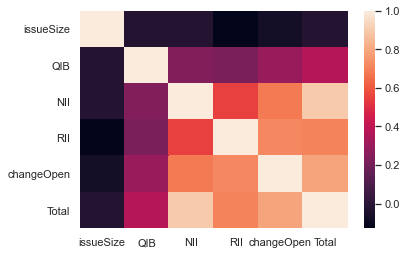

In [113]:
sns.heatmap(ipo.corr())

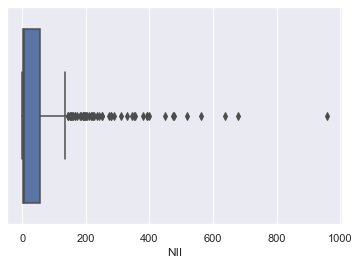

In [114]:
sns.boxplot(ipo.NII)

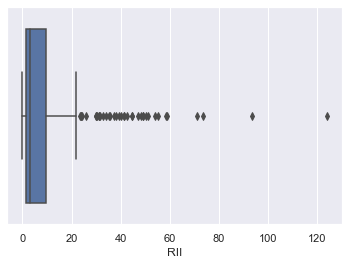

In [115]:
sns.boxplot(ipo.RII)

### Removing data > 99th percentile

In [116]:
q99 = ipo.QIB.quantile(0.99)
n99 = ipo.NII.quantile(0.99)
r99 = ipo.RII.quantile(0.99)
ipo = ipo[(ipo.QIB < q99) & (ipo.NII < n99) & (ipo.RII < r99)  ]

In [117]:
ipo.shape

(377, 8)

In [118]:
ipo.columns

Index(['Issuer Company', 'Listing Date', 'issueSize', 'QIB', 'NII', 'RII',
       'changeOpen', 'Total'],
      dtype='object')

## Filling Null values

In [119]:
ipo.isna().sum()

Issuer Company    0
Listing Date      0
issueSize         0
QIB               0
NII               0
RII               0
changeOpen        0
Total             0
dtype: int64

In [120]:
ipo.QIB = ipo.QIB.fillna(ipo.QIB.mean())
ipo.RII= ipo.RII.fillna(ipo.RII.mean())
ipo.NII = ipo.NII.fillna(ipo.NII.mean())
ipo.Total = ipo.Total.fillna(ipo.Total.mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


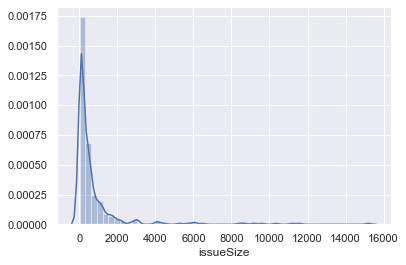

In [121]:
dep_var = ["issueSize",'QIB', 'NII', 'RII',"changeOpen",]
sns.distplot(ipo[dep_var[0]])
    

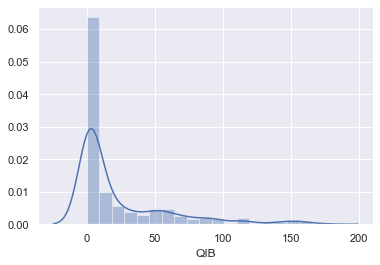

In [88]:
sns.distplot(ipo[dep_var[1]])
    

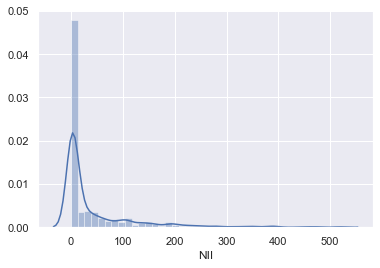

In [89]:
sns.distplot(ipo[dep_var[2]])
    

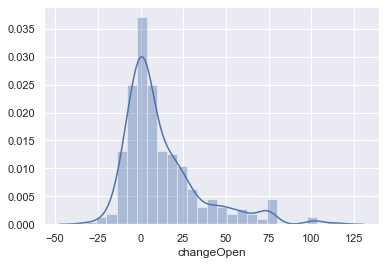

In [90]:
sns.distplot((ipo[dep_var[4]]))

In [91]:
dep_var

['issueSize', 'QIB', 'NII', 'RII', 'changeOpen']

In [92]:
ipo.describe()

,issueSize,QIB,NII,RII,changeOpen,Total
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,788.445756,24.173740,45.290769,7.406233,12.177719,21.196684
std,1733.208105,36.514817,83.260988,10.521354,22.735748,31.176710
min,14.000000,0.010000,0.030000,0.030000,-31.700000,0.440000
25%,85.930000,1.340000,1.740000,1.180000,-1.900000,1.810000
50%,248.070000,5.690000,5.110000,3.100000,4.900000,4.980000
75%,653.980000,35.260000,48.850000,8.730000,20.000000,30.820000
max,15199.440000,174.990000,519.260000,58.610000,115.000000,165.660000


#### Distplot of independent variables

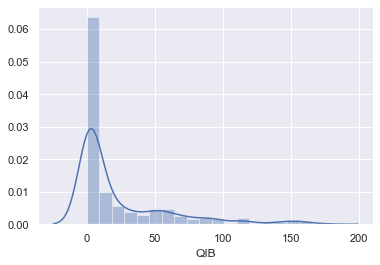

In [93]:
sns.distplot(ipo[dep_var[1]])
    

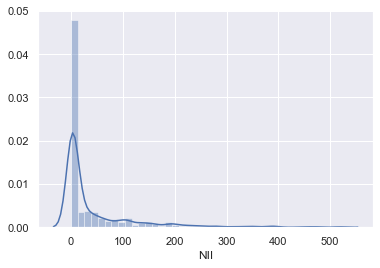

In [94]:
sns.distplot(ipo[dep_var[2]])
    

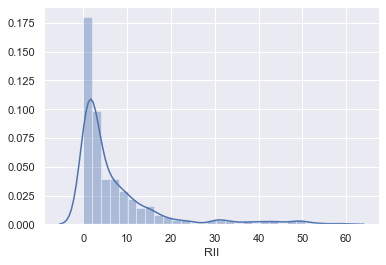

In [95]:
sns.distplot(ipo[dep_var[3]])
    

#### scatter plot to confirm our findings from heatmap

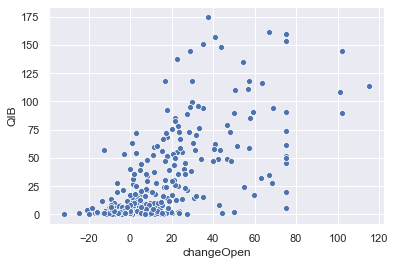

In [96]:
sns.scatterplot(ipo.changeOpen,ipo.QIB)

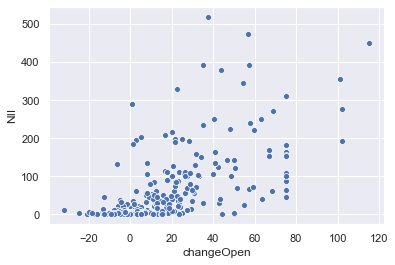

In [97]:
sns.scatterplot(ipo.changeOpen,ipo.NII)

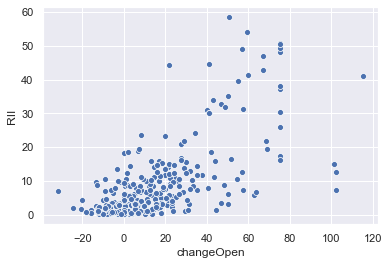

In [98]:
sns.scatterplot(ipo.changeOpen,ipo.RII)

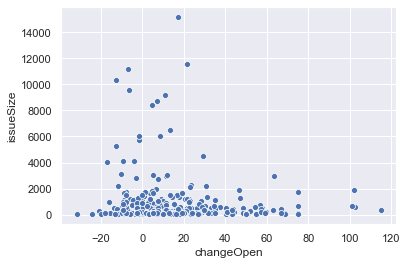

In [99]:
sns.scatterplot(ipo.changeOpen,ipo.issueSize)

### Log- transformation - To deal with skewness

In [100]:
x_log = np.log(ipo[['NII', 'QIB',"RII"]])
y = ipo[dep_var[-1]]

In [101]:
x_log

,NII,QIB,RII
0,-0.673345,1.856298,-1.427116
1,-1.514128,1.363537,0.732368
2,0.431782,3.090588,3.165897
4,-0.072571,1.205971,0.841567
5,-0.371064,1.747459,1.460938
...,...,...,...
414,4.170225,4.771532,2.517696
415,3.479392,2.788708,2.522524
416,-0.755023,0.307485,-0.094311
417,3.394173,2.728506,2.672768


#### Distplot of log transformed dataset

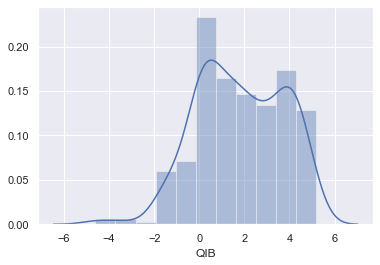

In [102]:
sns.distplot(np.log(ipo.QIB))

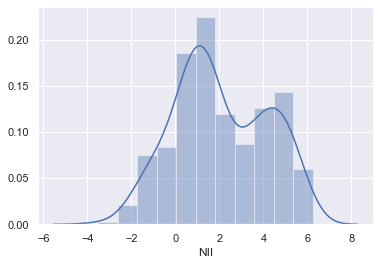

In [103]:
sns.distplot(np.log(ipo.NII))

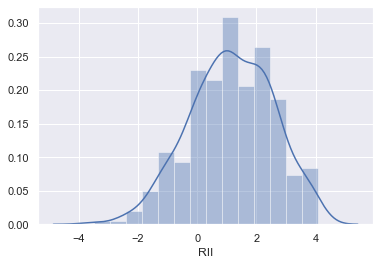

In [104]:
sns.distplot(np.log(ipo.RII))

## log-level multiple linear regression model

In [105]:
ans = 0
for i in range(50):
    from sklearn.model_selection import train_test_split
    scaler = StandardScaler()
    scaler.fit(x_log)
    x_train,x_test,y_train,y_test = train_test_split(x_log,y,test_size = 0.2)
#     x_scaled = scaler.transform(x_train)
#     xtest_scaled = scaler.transform(x_test)

    reg = LinearRegression()
    reg.fit(x_train,y_train)

    ans += reg.score(x_test,y_test)
print(ans/50)    

0.5054781155908643


### R-squared = 0.50

## Non- transformed, scaled dataset


In [106]:
x = ipo[['QIB', 'RII',"NII"]]
y = ipo[dep_var[-1]]
x

,QIB,RII,NII
0,6.40,0.24,0.51
1,3.91,2.08,0.22
2,21.99,23.71,1.54
4,3.34,2.32,0.93
5,5.74,4.31,0.69
...,...,...,...
414,118.10,12.40,64.73
415,16.26,12.46,32.44
416,1.36,0.91,0.47
417,15.31,14.48,29.79


In [107]:
ans = 0
for i in range(50):

    
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    scaler = StandardScaler()
    scaler.fit(x)
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=i)
    x_scaled = scaler.transform(x_train)
    xtest_scaled = scaler.transform(x_test)

    reg = LinearRegression()
    reg.fit(x_scaled,y_train)

    reg.predict(xtest_scaled)


    ans += (reg.score(xtest_scaled,y_test))
print(ans/50)

0.6239167226437518


### R-squared  = 0.62